<a href="https://colab.research.google.com/github/jessicagrunewald/service_maintenance_tickets-calls_IFMG/blob/main/IFMG_Chamados_de_suporte_2019_a_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise descritiva e previsão de chamados de suporte - Instituto Federal de Minas Gerais (IFMG)**

Base de dados disponível neste [link](https://dadosabertos.ifmg.edu.br/dataset/chamados-de-suporte).

# 🔧 **Configurações iniciais**

## 📚 **Bibliotecas**

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

📘 A função `mean_absolute_error` e a função `mean_squared_error`, ambas da biblioteca `sklearn.metrics`, são usadas para medir a diferença entre valores reais e valores previstos em problemas de regressão.

In [110]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

📙 O **Prophet** é uma ferramenta de modelagem de séries temporais, projetada para fazer previsões de séries temporais com dados que apresentam padrões sazonais e feriados.

In [111]:
from prophet import Prophet

## 🔗 **Link de acesso ao dataset**

In [112]:
url = "http://dadosabertos.ifmg.edu.br/dataset/8339d8d9-deca-4de7-9070-aa5052975292/resource/a7efa452-03d9-435d-82f8-f7344516ad72/download/conjunto-de-dados-chamados-de-suporte.csv"

## 🎯 **Carregando o dataset**

In [113]:
df = pd.read_csv(url)

# 📊 **Análise descritiva**

## 🔹 **Total de chamados por Área da Universidade**

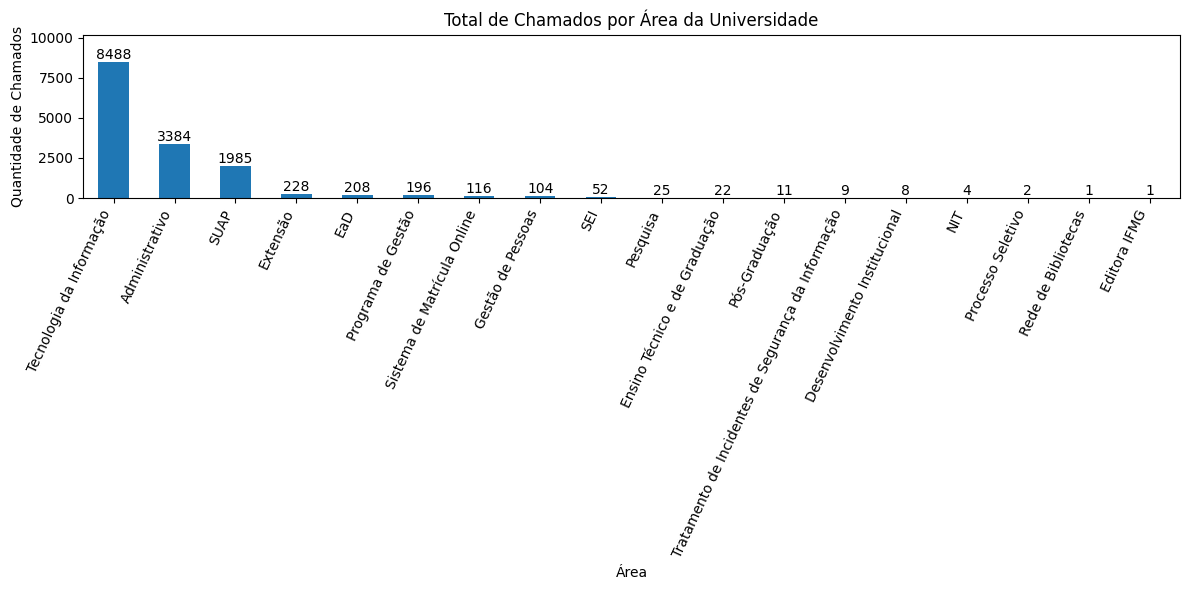

In [114]:
total_por_area = df['area'].value_counts()
ax = total_por_area.plot(kind='bar', figsize=(12, 6))
plt.title('Total de Chamados por Área da Universidade')
plt.xlabel('Área')
plt.ylabel('Quantidade de Chamados')

# Ajustar a rotação dos rótulos no eixo X
plt.xticks(rotation=65, ha='right')

# Adicionando os valores em cima das barras
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10)

# Ajustando o limite do eixo Y para deixar mais espaço no topo
plt.ylim(0, total_por_area.max() * 1.2)

# Ajustar o espaçamento inferior
plt.tight_layout()
plt.show()

## 🔹 **Total de chamados por Campus da Universidade**

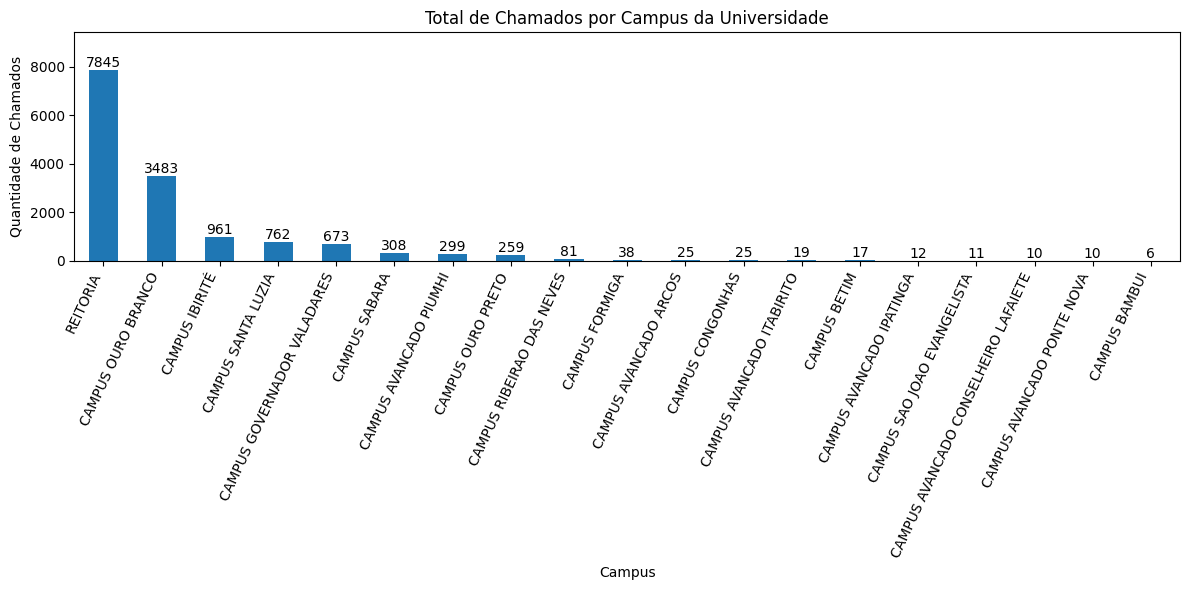

In [115]:
total_por_area = df['campus'].value_counts()
ax = total_por_area.plot(kind='bar', figsize=(12, 6))
plt.title('Total de Chamados por Campus da Universidade')
plt.xlabel('Campus')
plt.ylabel('Quantidade de Chamados')

# Ajustar a rotação dos rótulos no eixo X
plt.xticks(rotation=65, ha='right')

# Adicionando os valores em cima das barras
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10)

# Ajustando o limite do eixo Y para deixar mais espaço no topo
plt.ylim(0, total_por_area.max() * 1.2)

# Ajustar o espaçamento inferior
plt.tight_layout()
plt.show()

## 🔹 **Total de chamados por Ano (2019 a 2024)**

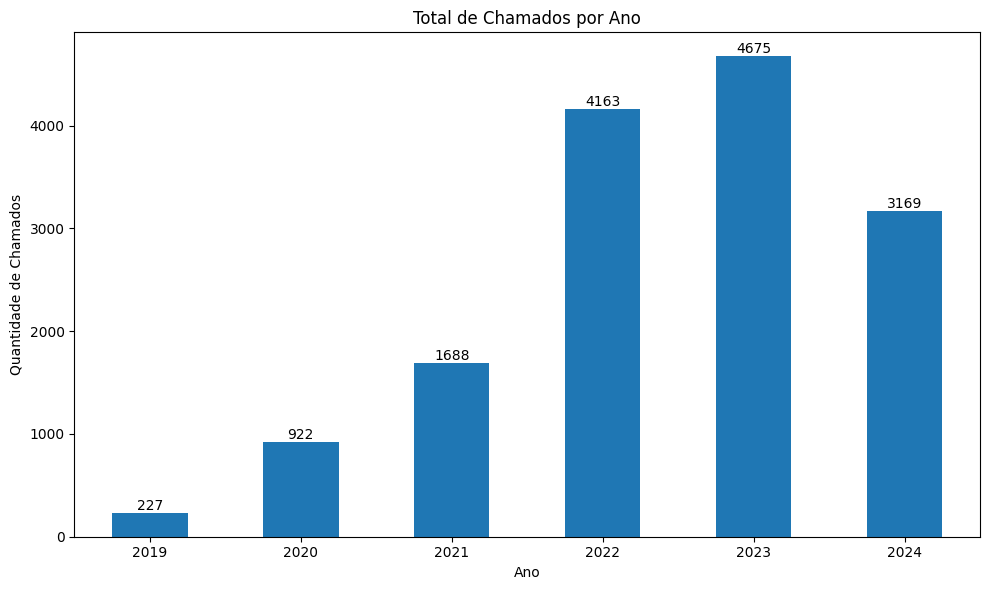

In [116]:
df['ano'] = pd.to_datetime(df['aberto-em'], dayfirst=True).dt.year
total_por_ano = df['ano'].value_counts().sort_index()

ax = total_por_ano.plot(kind='bar', figsize=(10, 6))
plt.title('Total de Chamados por Ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Chamados')

# Ajustar a rotação dos rótulos no eixo X e convertê-los para inteiros
ax.set_xticklabels(total_por_ano.index.astype(int), rotation=0)

# Adicionando os valores em cima das barras
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

## 🔹 **Total de chamados Cancelados por Área da Universidade**

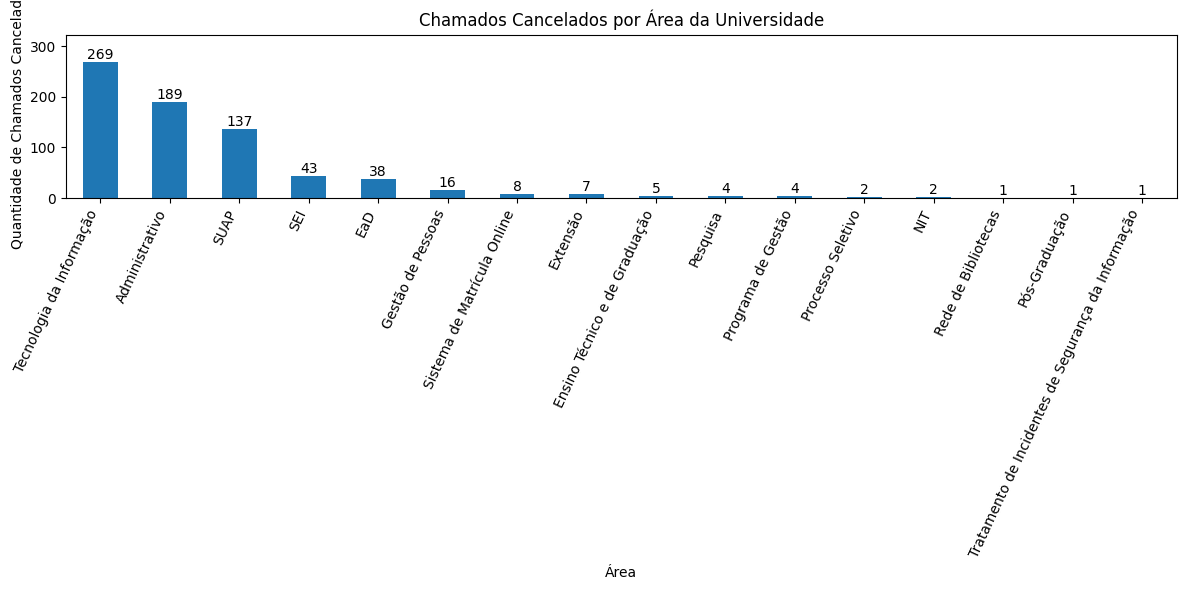

In [117]:
cancelados_por_area = df[df['status'] == 'Cancelado']['area'].value_counts()
ax = cancelados_por_area.plot(kind='bar', figsize=(12, 6))
plt.title('Chamados Cancelados por Área da Universidade')
plt.xlabel('Área')
plt.ylabel('Quantidade de Chamados Cancelados')
# Ajustar a rotação dos rótulos no eixo X
plt.xticks(rotation=65, ha='right')

# Ajustando o limite do eixo Y para deixar mais espaço no topo
plt.ylim(0, cancelados_por_area.max() * 1.2)

# Adicionando os valores em cima das barras
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

## 🔹 **Total de chamados Cancelados por Campus da Universidade**

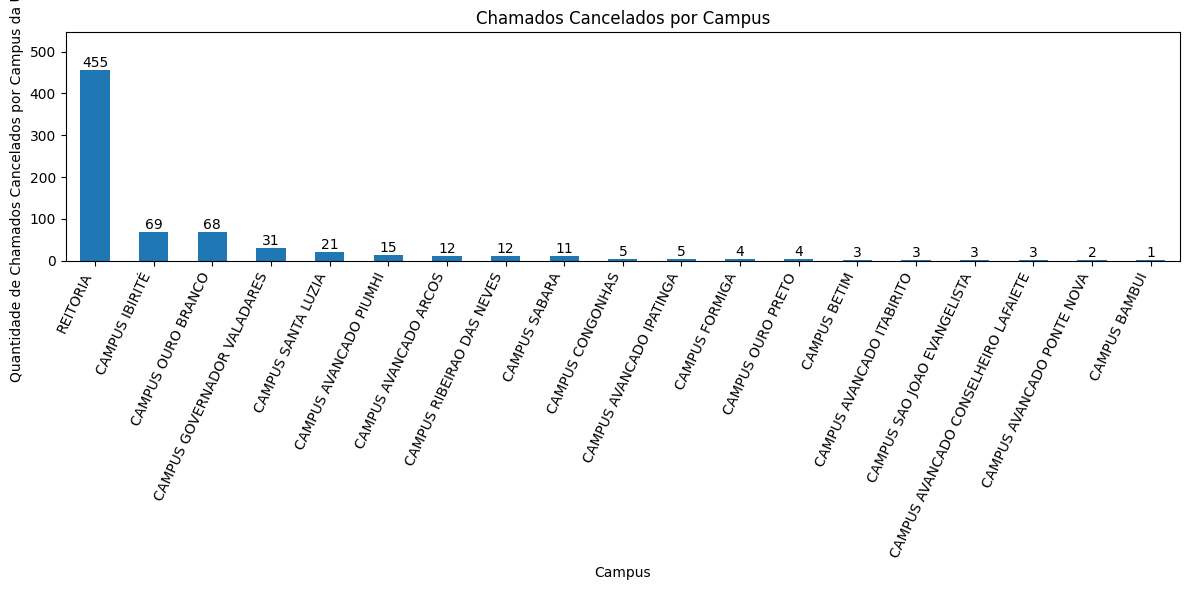

In [118]:
cancelados_por_campus = df[df['status'] == 'Cancelado']['campus'].value_counts()
ax = cancelados_por_campus.plot(kind='bar', figsize=(12, 6))
plt.title('Chamados Cancelados por Campus')
plt.xlabel('Campus')
plt.ylabel('Quantidade de Chamados Cancelados por Campus da Universidade')
# Ajustar a rotação dos rótulos no eixo X
plt.xticks(rotation=65, ha='right')

# Ajustando o limite do eixo Y para deixar mais espaço no topo
plt.ylim(0, cancelados_por_campus.max() * 1.2)

# Adicionando os valores em cima das barras
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

## 🔹 **Principais chamados por Grupo de Serviço - na área de Tecnologia da Informação**

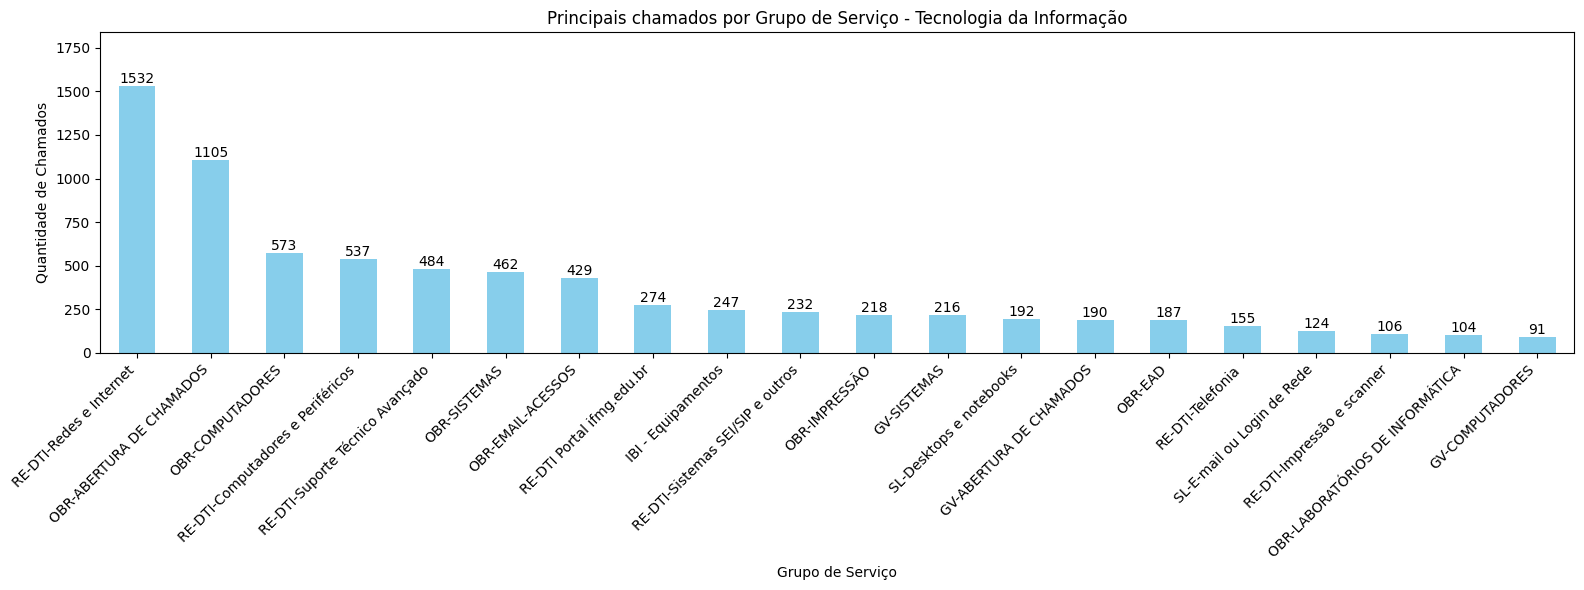

In [119]:
# Filtrar os dados onde a área é "Tecnologia da Informação"
df_ti = df[df['area'] == 'Tecnologia da Informação']

# Contar os chamados por grupo de serviço e selecionar os 20 maiores
total_por_grupo_servico = df_ti['grupo-de-servico'].value_counts().head(20)

# Plotar o gráfico de barras
ax = total_por_grupo_servico.plot(kind='bar', figsize=(16, 6), color='skyblue')
plt.title('Principais chamados por Grupo de Serviço - Tecnologia da Informação')
plt.xlabel('Grupo de Serviço')
plt.ylabel('Quantidade de Chamados')

# Ajustar a rotação dos rótulos no eixo X
plt.xticks(rotation=45, ha='right')

# Adicionando os valores em cima das barras
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10)

# Ajustar o limite do eixo Y para deixar mais espaço no topo
plt.ylim(0, total_por_grupo_servico.max() * 1.2)

# Ajustar o espaçamento do layout
plt.tight_layout()
plt.show()

## 🔹 **Principais chamados por Grupo de Serviço - na área Administrativo**

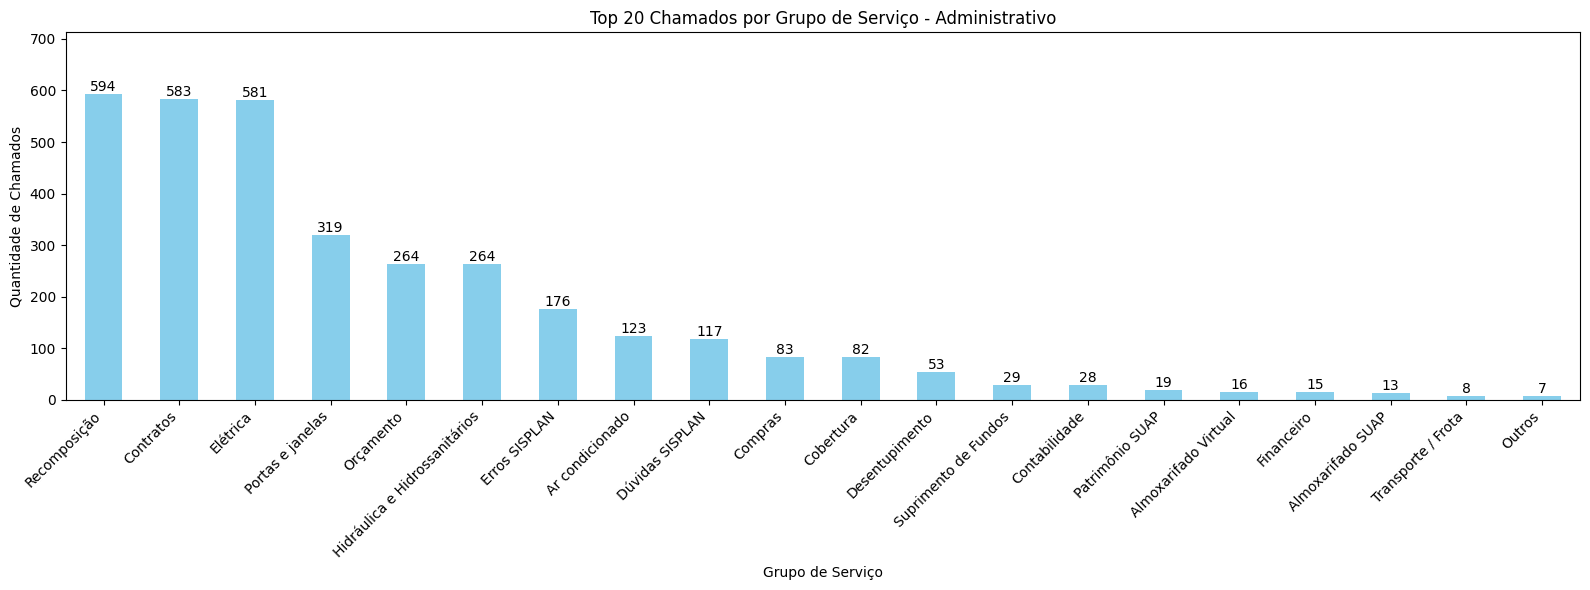

In [120]:
# Filtrar os dados onde a área é "Tecnologia da Informação"
df_ti = df[df['area'] == 'Administrativo']

# Contar os chamados por grupo de serviço e selecionar os 20 maiores
total_por_grupo_servico = df_ti['grupo-de-servico'].value_counts().head(20)

# Plotar o gráfico de barras
ax = total_por_grupo_servico.plot(kind='bar', figsize=(16, 6), color='skyblue')
plt.title('Top 20 Chamados por Grupo de Serviço - Administrativo')
plt.xlabel('Grupo de Serviço')
plt.ylabel('Quantidade de Chamados')

# Ajustar a rotação dos rótulos no eixo X
plt.xticks(rotation=45, ha='right')

# Adicionando os valores em cima das barras
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10)

# Ajustar o limite do eixo Y para deixar mais espaço no topo
plt.ylim(0, total_por_grupo_servico.max() * 1.2)

# Ajustar o espaçamento do layout
plt.tight_layout()
plt.show()

## 🔹 **Tempo médio (em dias) para atendimento de chamados por Área da Universidade**

In [121]:
# Converter colunas de datas para o formato datetime (com dayfirst=True)
df['aberto-em'] = pd.to_datetime(df['aberto-em'], dayfirst=True)
df['solucionado-em'] = pd.to_datetime(df['solucionado-em'], dayfirst=True)

# Filtrar apenas chamados com status "Fechado"
df_fechado = df[df['status'] == 'Fechado']

# Calcular o tempo de atendimento em dias com precisão decimal
df_fechado['tempo_atendimento'] = (df_fechado['solucionado-em'] - df_fechado['aberto-em']) / pd.Timedelta(days=1)

# Agrupar por 'area' e calcular o ticket médio (média de tempo de atendimento)
ticket_medio_por_area = df_fechado.groupby('area')['tempo_atendimento'].mean().sort_values()

<ipython-input-121-b6dcf4ec414c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fechado['tempo_atendimento'] = (df_fechado['solucionado-em'] - df_fechado['aberto-em']) / pd.Timedelta(days=1)


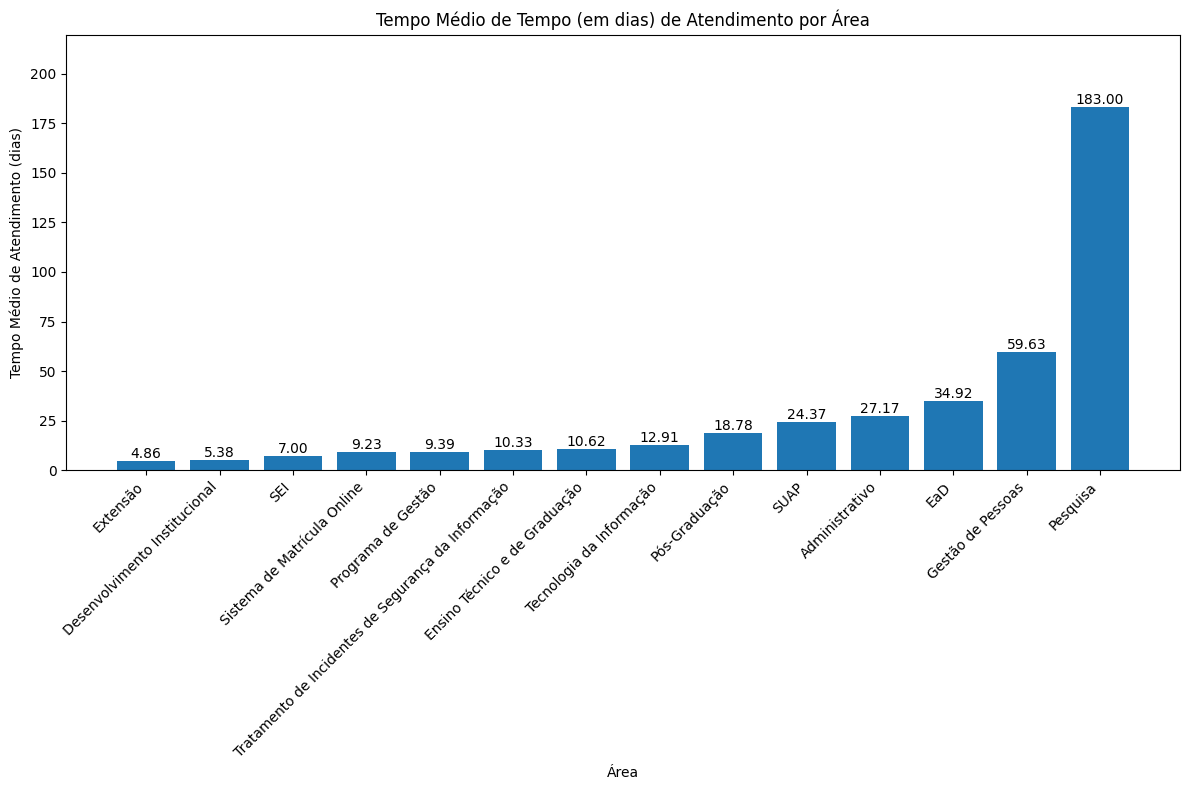

In [122]:
# Criar o gráfico
plt.figure(figsize=(12, 8))
bars = plt.bar(ticket_medio_por_area.index, ticket_medio_por_area.values)
plt.title('Tempo Médio de Tempo (em dias) de Atendimento por Área')
plt.xlabel('Área')
plt.ylabel('Tempo Médio de Atendimento (dias)')
# Ajustar a rotação dos rótulos no eixo X
plt.xticks(rotation=45, ha='right')

# Adicionar os valores em cima de cada barra
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

# Ajustar o eixo Y para ser mais longo
plt.ylim(0, ticket_medio_por_area.max() * 1.2)

# Melhorar o layout
plt.tight_layout()
plt.show()

## 🔹 **Total de chamados abertos de janeiro a 19 de agosto de cada ano (2019 a 2024)**

O filtro de janeiro a 19 de agosto foi adicionado, pois o dataset do ano de 2024 contém dados apenas até essa data.

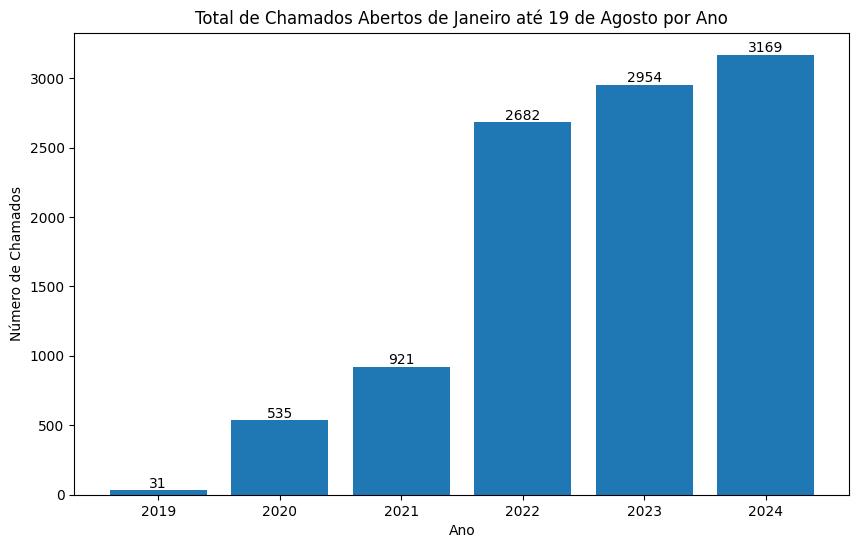

In [123]:
# Garantir que a coluna 'aberto-em' esteja no formato de data
df['aberto-em'] = pd.to_datetime(df['aberto-em'], dayfirst=True)

# Criar um filtro para cada ano de janeiro até 19 de agosto
df_filtrado_2019 = df[(df['aberto-em'] >= '2019-01-01') & (df['aberto-em'] <= '2019-08-19')]
df_filtrado_2020 = df[(df['aberto-em'] >= '2020-01-01') & (df['aberto-em'] <= '2020-08-19')]
df_filtrado_2021 = df[(df['aberto-em'] >= '2021-01-01') & (df['aberto-em'] <= '2021-08-19')]
df_filtrado_2022 = df[(df['aberto-em'] >= '2022-01-01') & (df['aberto-em'] <= '2022-08-19')]
df_filtrado_2023 = df[(df['aberto-em'] >= '2023-01-01') & (df['aberto-em'] <= '2023-08-19')]
df_filtrado_2024 = df[(df['aberto-em'] >= '2024-01-01') & (df['aberto-em'] <= '2024-08-19')]

# Contar o número de chamados por ano
total_2019 = len(df_filtrado_2019)
total_2020 = len(df_filtrado_2020)
total_2021 = len(df_filtrado_2021)
total_2022 = len(df_filtrado_2022)
total_2023 = len(df_filtrado_2023)
total_2024 = len(df_filtrado_2024)

# Criar uma lista com os totais para cada ano
totais = [total_2019, total_2020, total_2021, total_2022, total_2023, total_2024]
anos = ['2019', '2020', '2021', '2022', '2023', '2024']

# Criar o gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(anos, totais)

# Adicionar os totais em cima de cada barra
for i in ax.patches:
    ax.annotate(f'{i.get_height()}',
                (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center', va='center',
                fontsize=10, color='black',
                xytext=(0, 5), textcoords='offset points')

# Ajustar título e rótulos
plt.title('Total de Chamados Abertos de Janeiro até 19 de Agosto por Ano')
plt.xlabel('Ano')
plt.ylabel('Número de Chamados')

# Mostrar o gráfico
plt.show()

## 🔹 **Total de chamados cancelados de janeiro a 19 de agosto de cada ano (2019 a 2024)**

O filtro de janeiro a 19 de agosto foi adicionado, pois o dataset do ano de 2024 contém dados apenas até essa data.

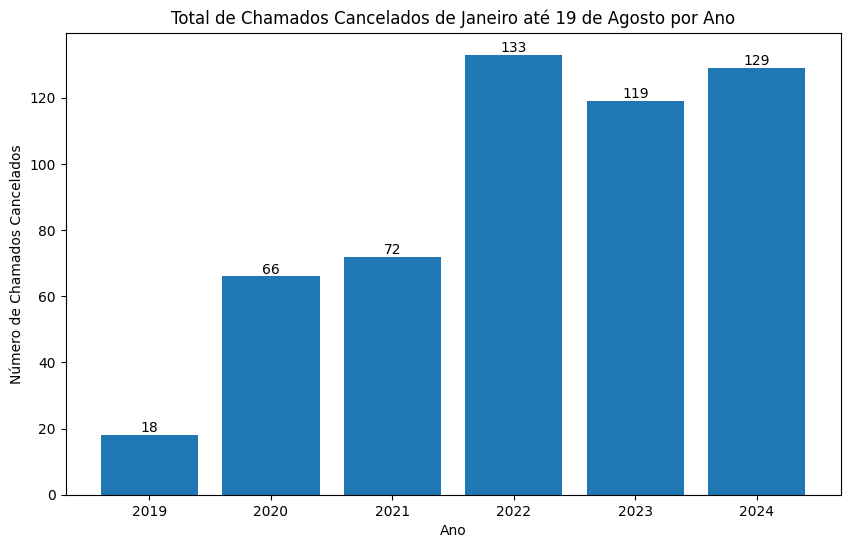

In [124]:
# Garantir que a coluna 'aberto-em' esteja no formato de data
df['aberto-em'] = pd.to_datetime(df['aberto-em'], dayfirst=True)

# Filtrar os chamados com status 'Cancelado'
df_cancelado = df[df['status'] == 'Cancelado']

# Criar um filtro para cada ano de janeiro até 19 de agosto para os chamados Cancelados
df_cancelado_2019 = df_cancelado[(df_cancelado['aberto-em'] >= '2019-01-01') & (df_cancelado['aberto-em'] <= '2019-08-19')]
df_cancelado_2020 = df_cancelado[(df_cancelado['aberto-em'] >= '2020-01-01') & (df_cancelado['aberto-em'] <= '2020-08-19')]
df_cancelado_2021 = df_cancelado[(df_cancelado['aberto-em'] >= '2021-01-01') & (df_cancelado['aberto-em'] <= '2021-08-19')]
df_cancelado_2022 = df_cancelado[(df_cancelado['aberto-em'] >= '2022-01-01') & (df_cancelado['aberto-em'] <= '2022-08-19')]
df_cancelado_2023 = df_cancelado[(df_cancelado['aberto-em'] >= '2023-01-01') & (df_cancelado['aberto-em'] <= '2023-08-19')]
df_cancelado_2024 = df_cancelado[(df_cancelado['aberto-em'] >= '2024-01-01') & (df_cancelado['aberto-em'] <= '2024-08-19')]

# Contar o número de chamados cancelados por ano
total_cancelado_2019 = len(df_cancelado_2019)
total_cancelado_2020 = len(df_cancelado_2020)
total_cancelado_2021 = len(df_cancelado_2021)
total_cancelado_2022 = len(df_cancelado_2022)
total_cancelado_2023 = len(df_cancelado_2023)
total_cancelado_2024 = len(df_cancelado_2024)

# Criar uma lista com os totais de chamados cancelados para cada ano
totais_cancelado = [total_cancelado_2019, total_cancelado_2020, total_cancelado_2021, total_cancelado_2022, total_cancelado_2023, total_cancelado_2024]
anos = ['2019', '2020', '2021', '2022', '2023', '2024']

# Criar o gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(anos, totais_cancelado)

# Adicionar os totais em cima de cada barra
for i in ax.patches:
    ax.annotate(f'{i.get_height()}',
                (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center', va='center',
                fontsize=10, color='black',
                xytext=(0, 5), textcoords='offset points')

# Ajustar título e rótulos
plt.title('Total de Chamados Cancelados de Janeiro até 19 de Agosto por Ano')
plt.xlabel('Ano')
plt.ylabel('Número de Chamados Cancelados')

# Mostrar o gráfico
plt.show()

## 🔹 **Top 20 Grupos de Serviço com maior número de chamados**

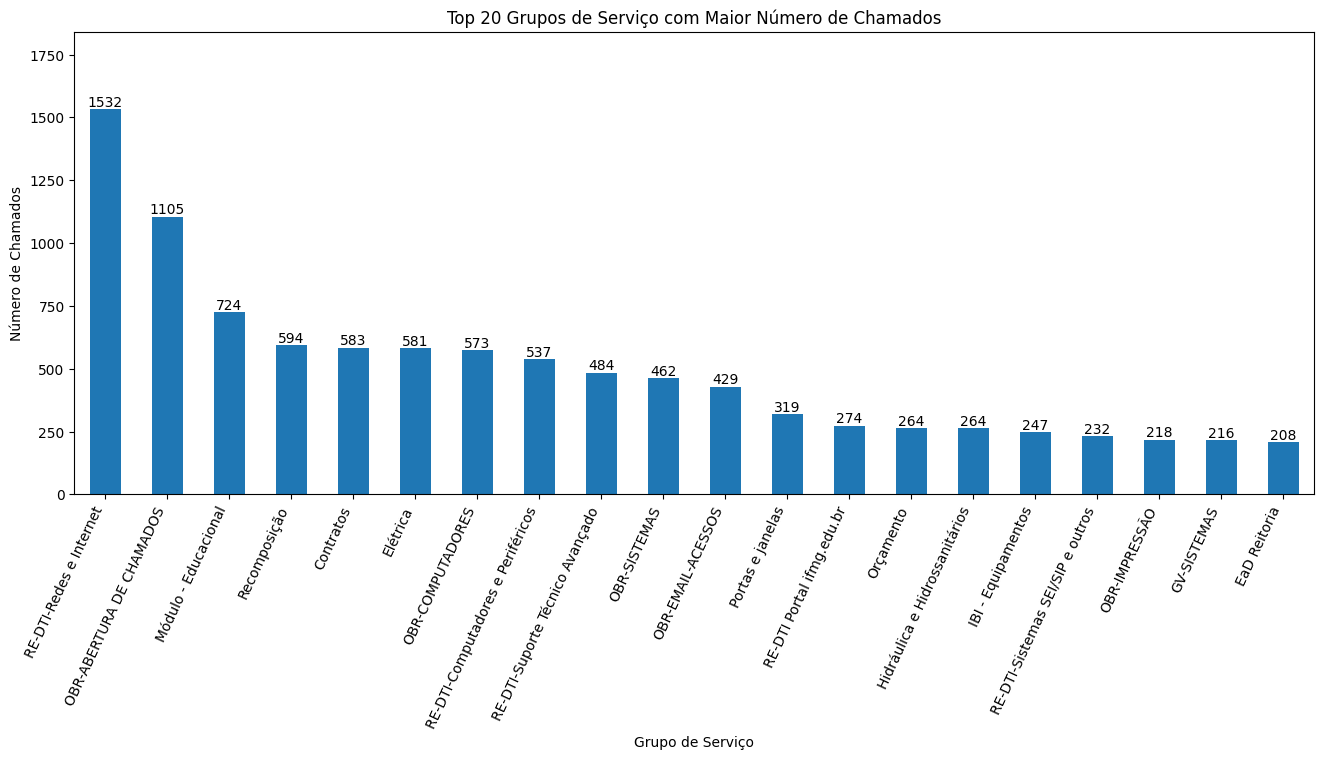

In [125]:
# Contar o número de chamados por grupo de serviço
chamados_por_grupo = df['grupo-de-servico'].value_counts()

# Selecionar os 20 grupos com maior número de chamados
top_20_grupos = chamados_por_grupo.head(20)

# Criar o gráfico de barras
fig, ax = plt.subplots(figsize=(16, 6))
top_20_grupos.plot(kind='bar', ax=ax)

# Adicionar os totais em cima de cada barra
for i in ax.patches:
    ax.annotate(f'{i.get_height()}',
                (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center', va='center',
                fontsize=10, color='black',
                xytext=(0, 5), textcoords='offset points')

# Ajustar o eixo Y para ser mais longo
plt.ylim(0, top_20_grupos.max() * 1.2)

# Ajustar título e rótulos
plt.title('Top 20 Grupos de Serviço com Maior Número de Chamados')
plt.xlabel('Grupo de Serviço')
plt.ylabel('Número de Chamados')

# Mostrar o gráfico
plt.xticks(rotation=65, ha='right')  # Para garantir que os rótulos dos grupos sejam legíveis
plt.show()

## 🔹 **Serviços mais frequentes no Grupo de Serviço RE-DTI-Redes e Internet**

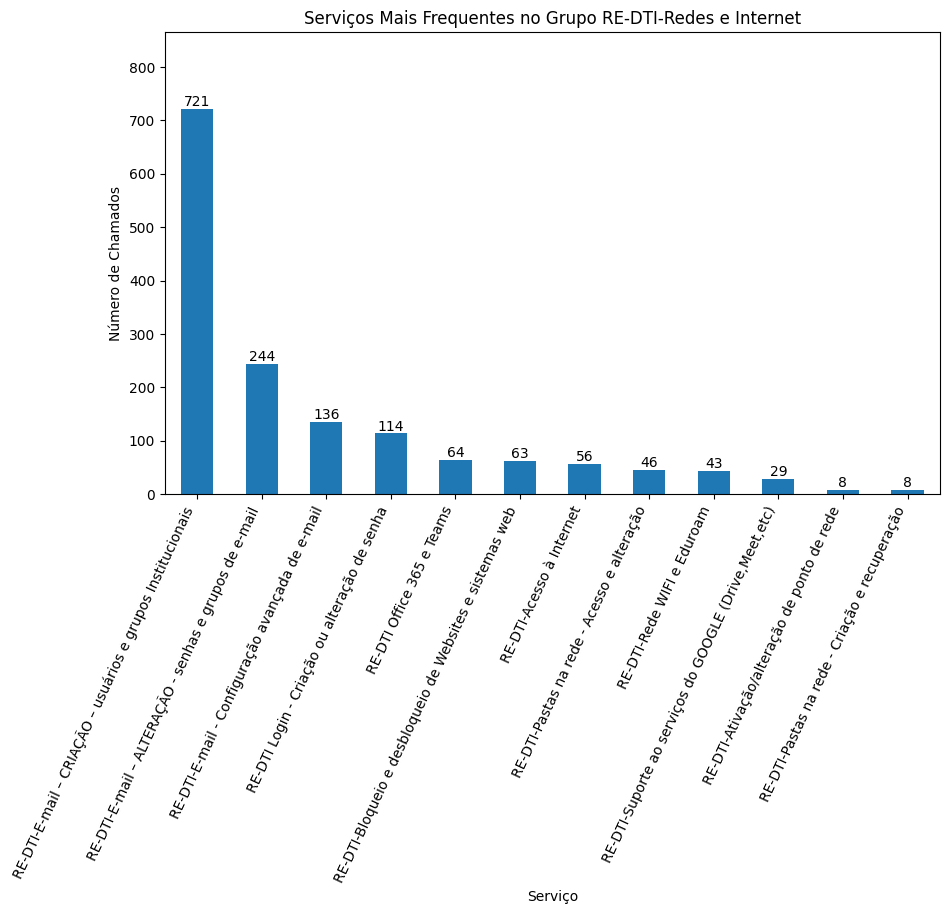

In [126]:
# Filtrar os dados para incluir apenas os chamados do grupo "RE-DTI-Redes e Internet"
df_re_dti = df[df['grupo-de-servico'] == 'RE-DTI-Redes e Internet']

# Contar os 20 serviços mais frequentes no grupo "RE-DTI-Redes e Internet"
top_20_servicos = df_re_dti['servico'].value_counts().head(20)

# Criar o gráfico de barras para os 20 serviços mais frequentes
fig, ax = plt.subplots(figsize=(10, 6))
top_20_servicos.plot(kind='bar', ax=ax)

# Adicionar os totais em cima de cada barra
for i in ax.patches:
    ax.annotate(f'{i.get_height()}',
                (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center', va='center',
                fontsize=10, color='black',
                xytext=(0, 5), textcoords='offset points')

# Ajustar o eixo Y para ser mais longo
plt.ylim(0, top_20_servicos.max() * 1.2)

# Ajustar título e rótulos
plt.title('Serviços Mais Frequentes no Grupo RE-DTI-Redes e Internet')
plt.xlabel('Serviço')
plt.ylabel('Número de Chamados')

# Mostrar o gráfico
plt.xticks(rotation=65, ha='right')  # Rotacionar os rótulos dos serviços para melhor legibilidade
plt.show()

# 📉 **Análise de comportamento na abertura de chamados**

## 🔹 **Chamados diários ao longo do tempo**

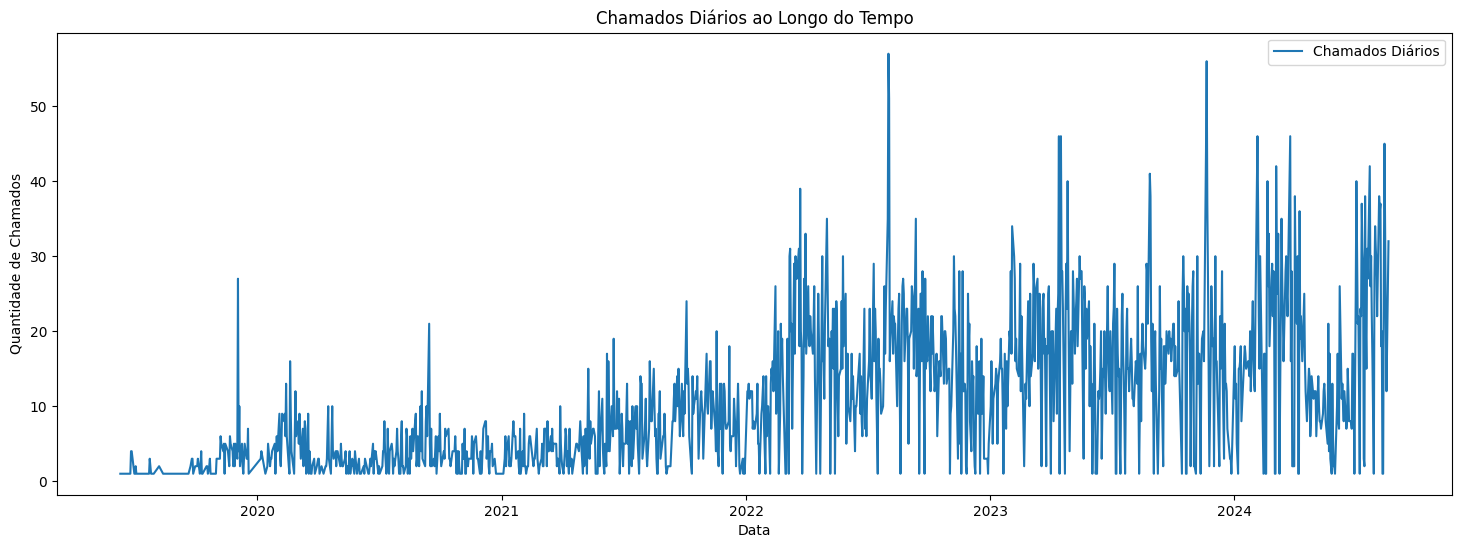

In [127]:
# Converter a coluna 'aberto-em' para datetime considerando o formato DD/MM/YYYY
df['aberto-em'] = pd.to_datetime(df['aberto-em'], dayfirst=True)

# Agrupar os dados por dia
df_daily = df.groupby(df['aberto-em'].dt.date).size().reset_index(name='chamados')

# Renomear a coluna de data para 'ds' (compatível com Prophet)
df_daily.rename(columns={'aberto-em': 'ds', 'chamados': 'y'}, inplace=True)

# Visualizar os dados
plt.figure(figsize=(18, 6))
plt.plot(df_daily['ds'], df_daily['y'], label='Chamados Diários')
plt.title('Chamados Diários ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Quantidade de Chamados')
plt.legend()
plt.show()

## 🔹 **Chamados diários ao longo do tempo - na área de Tecnologia da Informação**

<ipython-input-128-148eff3f2240>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tecnologia['aberto-em'] = pd.to_datetime(df_tecnologia['aberto-em'])


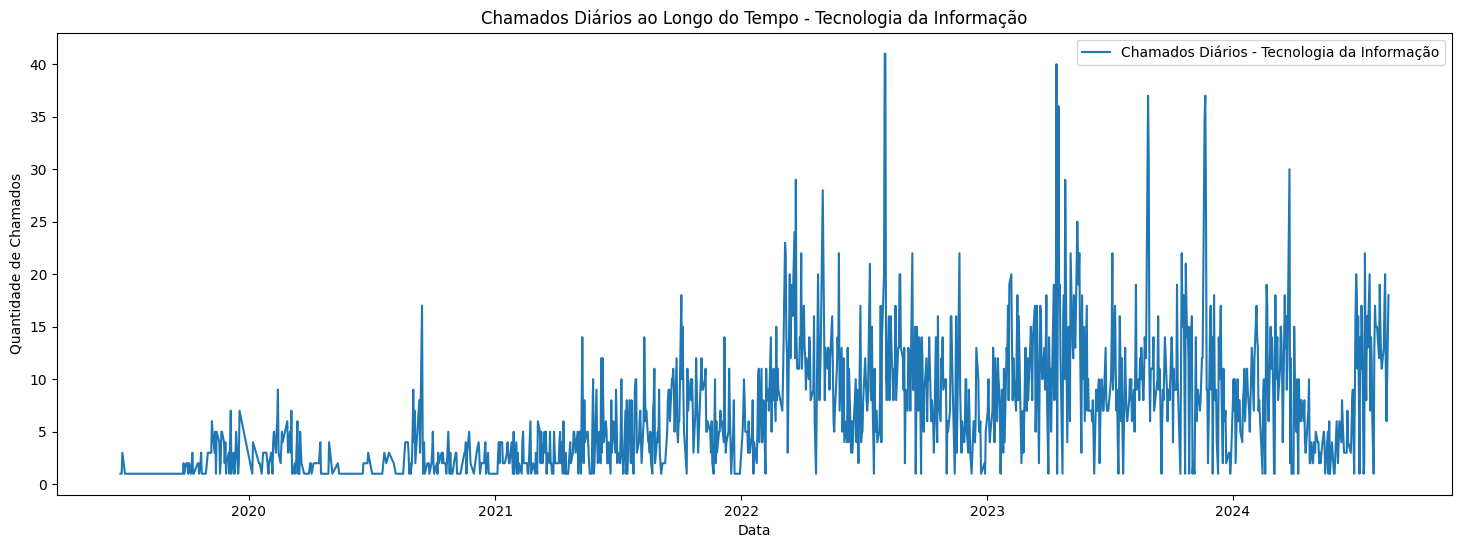

In [128]:
# Filtrar os dados para incluir apenas os chamados da área 'Tecnologia da Informação'
df_tecnologia = df[df['area'] == 'Tecnologia da Informação']

# Converter a coluna 'aberto-em' para datetime
df_tecnologia['aberto-em'] = pd.to_datetime(df_tecnologia['aberto-em'])

# Agrupar os dados por dia
df_daily_tecnologia = df_tecnologia.groupby(df_tecnologia['aberto-em'].dt.date).size().reset_index(name='chamados')

# Renomear a coluna de data para 'ds' (compatível com Prophet)
df_daily_tecnologia.rename(columns={'aberto-em': 'ds', 'chamados': 'y'}, inplace=True)

# Visualizar os dados
plt.figure(figsize=(18, 6))
plt.plot(df_daily_tecnologia['ds'], df_daily_tecnologia['y'], label='Chamados Diários - Tecnologia da Informação')
plt.title('Chamados Diários ao Longo do Tempo - Tecnologia da Informação')
plt.xlabel('Data')
plt.ylabel('Quantidade de Chamados')
plt.legend()
plt.show()

## 🔹 **Chamados diários ao longo do tempo - no campus Reitoria**

<ipython-input-129-16cca6ff73c4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reitoria['aberto-em'] = pd.to_datetime(df_reitoria['aberto-em'])


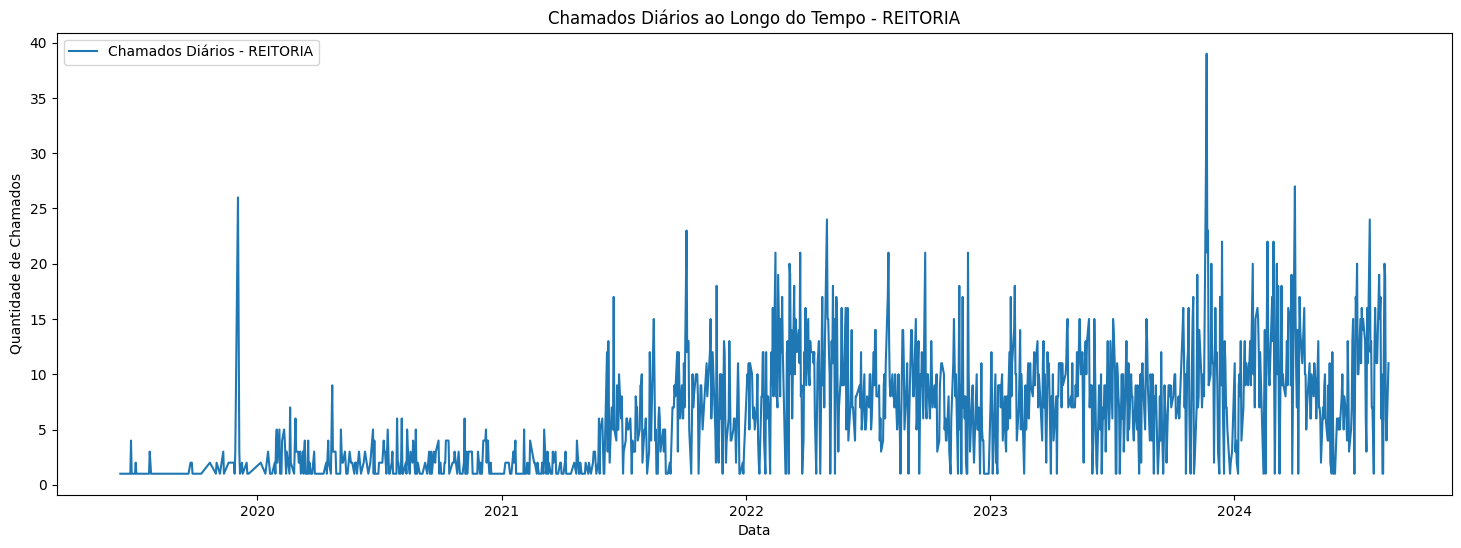

In [129]:
# Filtrar os dados para incluir apenas os chamados do campus 'REITORIA'
df_reitoria = df[df['campus'] == 'REITORIA']

# Converter a coluna 'aberto-em' para datetime
df_reitoria['aberto-em'] = pd.to_datetime(df_reitoria['aberto-em'])

# Agrupar os dados por dia
df_daily_reitoria = df_reitoria.groupby(df_reitoria['aberto-em'].dt.date).size().reset_index(name='chamados')

# Renomear a coluna de data para 'ds' (compatível com Prophet)
df_daily_reitoria.rename(columns={'aberto-em': 'ds', 'chamados': 'y'}, inplace=True)

# Visualizar os dados
plt.figure(figsize=(18, 6))
plt.plot(df_daily_reitoria['ds'], df_daily_reitoria['y'], label='Chamados Diários - REITORIA')
plt.title('Chamados Diários ao Longo do Tempo - REITORIA')
plt.xlabel('Data')
plt.ylabel('Quantidade de Chamados')
plt.legend()
plt.show()

## 🔹 **Previsão de chamados (360 dias)**

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3ady5pnq/cet6ht99.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3ady5pnq/ux3fw9qr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48756', 'data', 'file=/tmp/tmp3ady5pnq/cet6ht99.json', 'init=/tmp/tmp3ady5pnq/ux3fw9qr.json', 'output', 'file=/tmp/tmp3ady5pnq/prophet_model7qyrxsy6/prophet_model-20241120235400.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:54:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:54:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


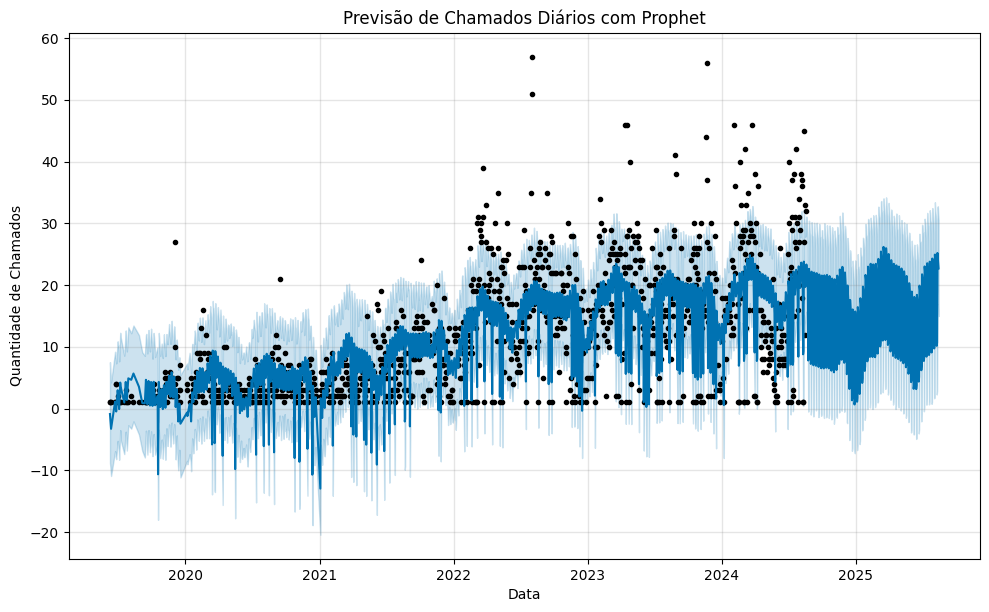

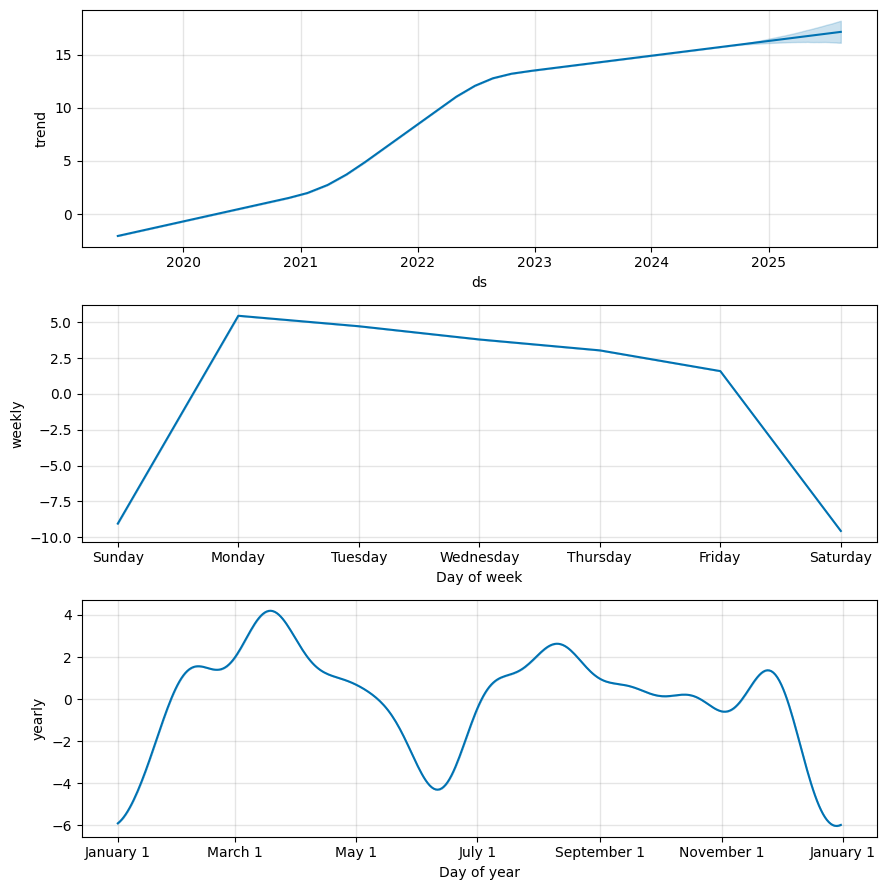

In [130]:
# Instanciar o modelo Prophet
model = Prophet()

# Ajustar o modelo aos dados
model.fit(df_daily)

# Criar um dataframe para previsões (360 dias à frente)
future = model.make_future_dataframe(periods=360)

# Gerar as previsões
forecast = model.predict(future)

# Visualizar a previsão
fig = model.plot(forecast)
plt.title('Previsão de Chamados Diários com Prophet')
plt.xlabel('Data')
plt.ylabel('Quantidade de Chamados')
plt.show()

# Exibir os componentes da série temporal (tendência, sazonalidade)
fig2 = model.plot_components(forecast)
plt.show()

**Avaliação do modelo**

In [131]:
# Separar conjunto de teste (os últimos 360 dias)
train = df_daily[:-360]
test = df_daily[-360:]

# Ajustar o modelo com os dados de treino
model = Prophet()
model.fit(train)

# Fazer previsões no período de teste
future_test = model.make_future_dataframe(periods=360)
forecast_test = model.predict(future_test)

# Filtrar previsões para o conjunto de teste
forecast_test = forecast_test[-360:]

# Avaliar o modelo
y_test = test['y'].values
y_pred = forecast_test['yhat'].values

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3ady5pnq/jzc5mfi0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3ady5pnq/y_i9y92m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73656', 'data', 'file=/tmp/tmp3ady5pnq/jzc5mfi0.json', 'init=/tmp/tmp3ady5pnq/y_i9y92m.json', 'output', 'file=/tmp/tmp3ady5pnq/prophet_modelrhryvkya/prophet_model-20241120235402.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:54:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:54:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MAE: 9.42
RMSE: 11.73


## 🔹 **Previsão de chamados (360 dias) na área de Tecnologia da Informação**


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3ady5pnq/iwz3_0wl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3ady5pnq/itaffh0z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90812', 'data', 'file=/tmp/tmp3ady5pnq/iwz3_0wl.json', 'init=/tmp/tmp3ady5pnq/itaffh0z.json', 'output', 'file=/tmp/tmp3ady5pnq/prophet_modelt96qbbbw/prophet_model-20241120235403.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:54:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:54:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


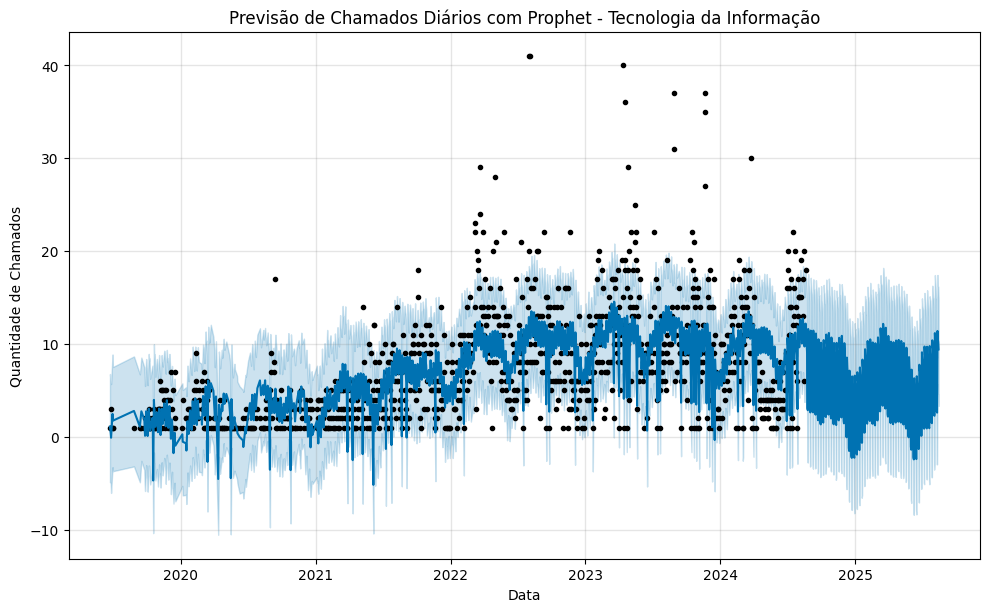

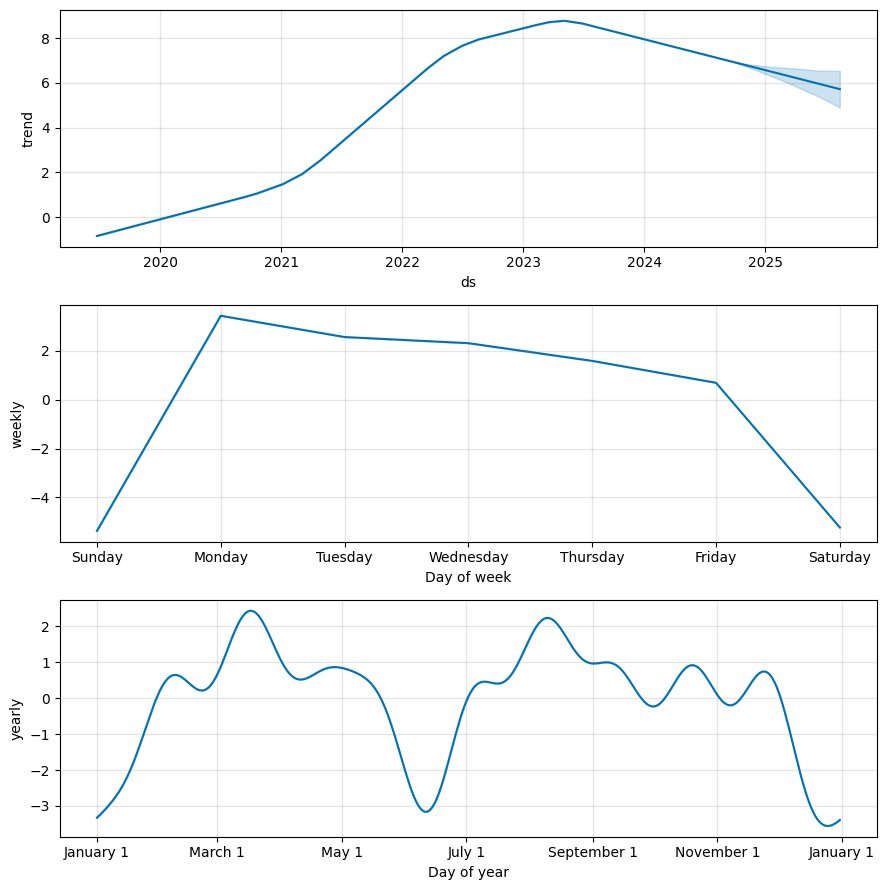

In [132]:
# Instanciar o modelo Prophet
model = Prophet()

# Ajustar o modelo aos dados filtrados
model.fit(df_daily_tecnologia)

# Criar um dataframe para previsões (360 dias à frente)
future_tec = model.make_future_dataframe(periods=360)

# Gerar as previsões
forecast = model.predict(future_tec)

# Visualizar a previsão
fig = model.plot(forecast)
plt.title('Previsão de Chamados Diários com Prophet - Tecnologia da Informação')
plt.xlabel('Data')
plt.ylabel('Quantidade de Chamados')
plt.show()

# Exibir os componentes da série temporal (tendência, sazonalidade)
fig2 = model.plot_components(forecast)
plt.show()

**Avaliação do modelo**

In [133]:
# Separar conjunto de treino
train = df_daily_tecnologia[:-360]
test = df_daily_tecnologia[-360:]

# Ajustar o modelo com os dados de treino
model = Prophet()
model.fit(train)

# Fazer previsões no período de teste
future_test = model.make_future_dataframe(periods=360)
forecast_test = model.predict(future_test)

# Filtrar previsões para o conjunto de teste
forecast_test = forecast_test[-360:]

# Avaliar o modelo
y_test = test['y'].values
y_pred = forecast_test['yhat'].values

# Calcular MAE e RMSE
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Exibir as métricas de avaliação
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3ady5pnq/any91m4w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3ady5pnq/22qvrrh6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52373', 'data', 'file=/tmp/tmp3ady5pnq/any91m4w.json', 'init=/tmp/tmp3ady5pnq/22qvrrh6.json', 'output', 'file=/tmp/tmp3ady5pnq/prophet_model0nd8k4wq/prophet_model-20241120235405.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:54:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:54:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MAE: 5.06
RMSE: 6.96


## 🔹 **Previsão de chamados (360 dias) no campus Reitoria**

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3ady5pnq/9yv3o217.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3ady5pnq/f5jt79vb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89191', 'data', 'file=/tmp/tmp3ady5pnq/9yv3o217.json', 'init=/tmp/tmp3ady5pnq/f5jt79vb.json', 'output', 'file=/tmp/tmp3ady5pnq/prophet_modelnjxy_thf/prophet_model-20241120235405.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:54:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:54:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


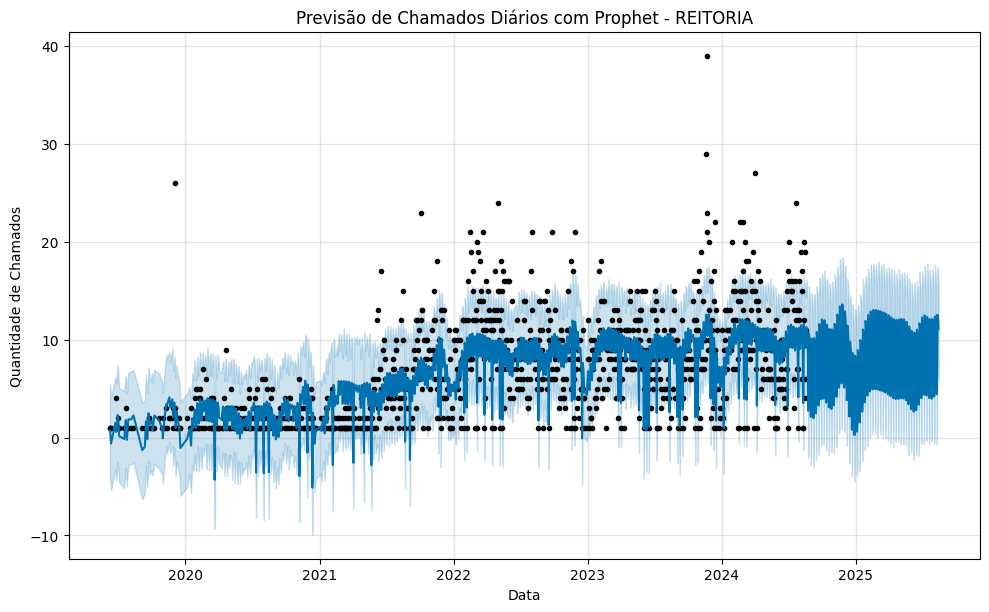

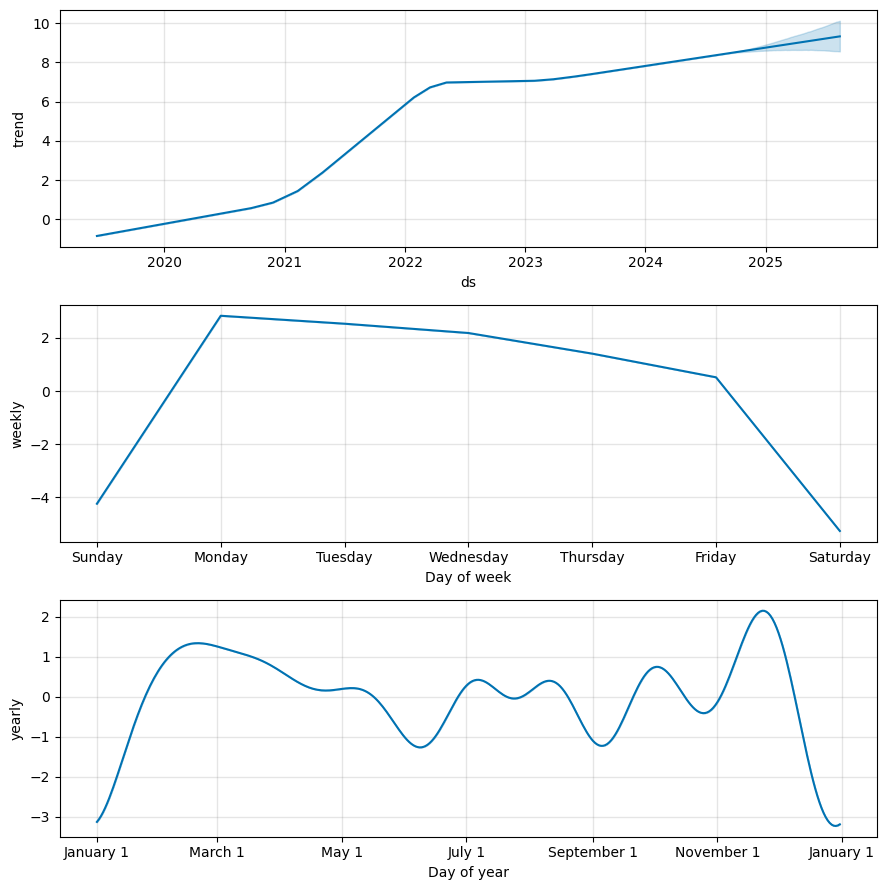

In [134]:
# Instanciar o modelo Prophet
model = Prophet()

# Ajustar o modelo aos dados filtrados
model.fit(df_daily_reitoria)

# Criar um dataframe para previsões (360 dias à frente)
future_reitoria = model.make_future_dataframe(periods=360)

# Gerar as previsões
forecast_reitoria = model.predict(future_reitoria)

# Visualizar a previsão
fig = model.plot(forecast_reitoria)
plt.title('Previsão de Chamados Diários com Prophet - REITORIA')
plt.xlabel('Data')
plt.ylabel('Quantidade de Chamados')
plt.show()

# Exibir os componentes da série temporal (tendência, sazonalidade)
fig2 = model.plot_components(forecast_reitoria)
plt.show()

**Avaliação do modelo**

In [135]:
# Separar conjunto de treino
train = df_daily_reitoria[:-360]
test = df_daily_reitoria[-360:]

# Ajustar o modelo com os dados de treino
model = Prophet()
model.fit(train)

# Fazer previsões no período de teste
future_test = model.make_future_dataframe(periods=360)
forecast_test = model.predict(future_test)

# Filtrar previsões para o conjunto de teste
forecast_test = forecast_test[-360:]

# Avaliar o modelo
y_test = test['y'].values
y_pred = forecast_test['yhat'].values

# Calcular MAE e RMSE
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Exibir as métricas de avaliação
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3ady5pnq/3k1lbufv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3ady5pnq/34j_9glv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34508', 'data', 'file=/tmp/tmp3ady5pnq/3k1lbufv.json', 'init=/tmp/tmp3ady5pnq/34j_9glv.json', 'output', 'file=/tmp/tmp3ady5pnq/prophet_model__epyzyp/prophet_model-20241120235407.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:54:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:54:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MAE: 5.08
RMSE: 6.74
